In [1]:
import pandas as pd

df=pd.read_csv("E:\GUVI\DATASCIENCE\FinalBalancedDataset.csv")

In [2]:
df

,Unnamed: 0,Toxicity,tweet
0,0,0,@user when a father is dysfunctional and is s...
1,1,0,@user @user thanks for #lyft credit i can't us...
2,2,0,bihday your majesty
3,3,0,#model i love u take with u all the time in ...
4,4,0,factsguide: society now #motivation
...,...,...,...
56740,56740,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
56741,56741,1,"you've gone and broke the wrong heart baby, an..."
56742,56742,1,young buck wanna eat!!.. dat nigguh like I ain...
56743,56743,1,youu got wild bitches tellin you lies


In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import string
import pandas as pd

stop_words=set(stopwords.words('english'))
def clean_text(texts):

    cleaned_texts=[]
    for text in texts:
        text=text.lower()
        tokens=word_tokenize(text)
        cleaned_token=[]
        lemmatizer=WordNetLemmatizer()
        
        for word in tokens:
            if (word.isalnum()) and (not word .isdigit()) and (word not in stop_words):
                word=word.strip(string.punctuation)
                word=lemmatizer.lemmatize(word)
                word=word.strip()
                cleaned_token.append(word)
            cleaned_text=" ".join(cleaned_token)
        cleaned_texts.append(cleaned_text)
    return cleaned_texts


In [4]:
df['clean_tweet']=clean_text(df['tweet'].values)

In [5]:
df

,Unnamed: 0,Toxicity,tweet,clean_tweet
0,0,0,@user when a father is dysfunctional and is s...,user father dysfunctional selfish drag kid dys...
1,1,0,@user @user thanks for #lyft credit i can't us...,user user thanks lyft credit ca use cause offe...
2,2,0,bihday your majesty,bihday majesty
3,3,0,#model i love u take with u all the time in ...,model love u take u time
4,4,0,factsguide: society now #motivation,factsguide society motivation
...,...,...,...,...
56740,56740,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,muthaf lie lifeasking right tl trash mine bibl...
56741,56741,1,"you've gone and broke the wrong heart baby, an...",gone broke wrong heart baby drove redneck crazy
56742,56742,1,young buck wanna eat!!.. dat nigguh like I ain...,young buck wan na eat dat nigguh like aint fuc...
56743,56743,1,youu got wild bitches tellin you lies,youu got wild bitch tellin lie


In [76]:
df.isna().sum()

Unnamed: 0     0
Toxicity       0
tweet          0
clean_tweet    0
dtype: int64

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

X=list(df['clean_tweet'].values)

count_vectorizer = CountVectorizer()

bag_of_words = count_vectorizer.fit_transform(X)

In [7]:
bag_of_words

<56745x52755 sparse matrix of type '<class 'numpy.int64'>'
	with 436389 stored elements in Compressed Sparse Row format>

In [8]:
df_bow = pd.DataFrame.sparse.from_spmatrix(bag_of_words)
df_bow.columns = count_vectorizer.get_feature_names_out()
df_bow.index=df['tweet']

In [9]:
df_bow.head()

,007beardownjedi,007hertzrumble,00h30,00sexilexi00,0124jessi,01takesthelead,05235fd083ad408,05professor,07cannon,0bama,...,zzachbarness,zzz,zzzentropy,zzzquil,zzzzzz,zzzzzzzz,zã¼rich,ë¹,ðµð¹,ó¾
tweet,,,,,,,,,,,,,,,,,,,,,
@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bihday your majesty,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
factsguide: society now #motivation,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus=list(df['clean_tweet'].values)

tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the "tweet" column to TF-IDF representation
tfidf = tfidf_vectorizer.fit_transform(corpus)

In [11]:
tfidf

<56745x52755 sparse matrix of type '<class 'numpy.float64'>'
	with 436389 stored elements in Compressed Sparse Row format>

In [12]:
df_tfidf = pd.DataFrame.sparse.from_spmatrix(tfidf)
df_tfidf.columns = tfidf_vectorizer.get_feature_names_out()
df_tfidf.index=df['tweet']

In [13]:
df_tfidf.head()

,007beardownjedi,007hertzrumble,00h30,00sexilexi00,0124jessi,01takesthelead,05235fd083ad408,05professor,07cannon,0bama,...,zzachbarness,zzz,zzzentropy,zzzquil,zzzzzz,zzzzzzzz,zã¼rich,ë¹,ðµð¹,ó¾
tweet,,,,,,,,,,,,,,,,,,,,,
@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
bihday your majesty,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
factsguide: society now #motivation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [15]:
X_train, X_test, y_train, y_test = train_test_split(bag_of_words, df['Toxicity'], test_size=0.2, random_state=42)

In [16]:
X=bag_of_words
y=df['Toxicity']

In [17]:
X.shape,y.shape

((56745, 52755), (56745,))

In [18]:
y.value_counts()

Toxicity
0    32592
1    24153
Name: count, dtype: int64

In [19]:
from imblearn.combine import SMOTETomek

X_new,y_new= SMOTETomek().fit_resample(X,y)

In [20]:
y_new.value_counts()

Toxicity
0    32559
1    32559
Name: count, dtype: int64

In [21]:
def accuracy_checking(X_data, y_data, algorithm):
  #train test splitting
  X_train, X_test, y_train, y_test= train_test_split(X_data, y_data, test_size= 0.2, random_state=42)

  model= algorithm().fit(X_train, y_train)

  y_pred_train= model.predict(X_train)
  y_pred_test= model.predict(X_test)

  #checking the accuracy_score
  accuracy_train= accuracy_score(y_train, y_pred_train)
  accuracy_test= accuracy_score(y_test, y_pred_test)

  metrics={"Algorithm": algorithm.__name__,
           "Accuracy_Train": accuracy_train,
           "Accuracy_Test": accuracy_test}
  return metrics

In [23]:
print(accuracy_checking(X_new,y_new,DecisionTreeClassifier))
print(accuracy_checking(X_new,y_new,RandomForestClassifier))
print(accuracy_checking(X_new,y_new,MultinomialNB))
print(accuracy_checking(X_new,y_new,KNeighborsClassifier))
print(accuracy_checking(X_new,y_new,SVC))

{'Algorithm': 'DecisionTreeClassifier', 'Accuracy_Train': 0.9985217324527722, 'Accuracy_Test': 0.8967132544923975}
{'Algorithm': 'RandomForestClassifier', 'Accuracy_Train': 0.9985025341729381, 'Accuracy_Test': 0.9119182921210259}
{'Algorithm': 'MultinomialNB', 'Accuracy_Train': 0.9440178160036861, 'Accuracy_Test': 0.918292121025956}
{'Algorithm': 'KNeighborsClassifier', 'Accuracy_Train': 0.7194939333435724, 'Accuracy_Test': 0.6601904469359545}
{'Algorithm': 'SVC', 'Accuracy_Train': 0.9669021655659653, 'Accuracy_Test': 0.9274305022270004}


In [22]:
# Decision Trees
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Random Forest
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Naive Bayes Model
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# K-NN Classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

# SVM
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

SVC()

In [35]:
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt

# Define a function to calculate metrics and confusion matrix
def calculate_metrics_and_confusion_matrix(classifier, X_test, y_test, label):
    y_pred = classifier.predict(X_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc_curve = auc(fpr, tpr)

    # Plot ROC curve with label
    plt.plot(fpr, tpr, label='%s (ROC AUC = %0.2f)' % (label, roc_auc))

    return precision, recall, f1, cm, roc_auc



Decision Trees Metrics:
Precision: 0.9282126412724989
Recall: 0.909370514660652
F1-Score: 0.9186949766960124
Confusion Matrix:
 [[6129  343]
 [ 442 4435]]
ROC-AUC Score: 0.9281864934242691




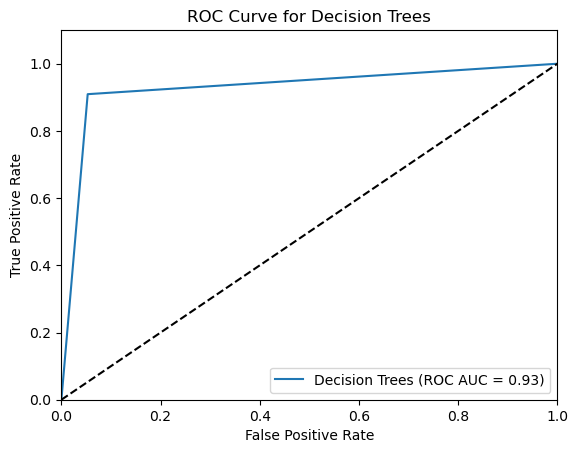

In [36]:
# Calculate metrics and plot ROC curve for Decision Trees classifier
dt_metrics = calculate_metrics_and_confusion_matrix(dt_classifier, X_test, y_test, "Decision Trees")

# Print metrics for Decision Trees
print("Decision Trees Metrics:")
print("Precision:", dt_metrics[0])
print("Recall:", dt_metrics[1])
print("F1-Score:", dt_metrics[2])
print("Confusion Matrix:\n", dt_metrics[3])
print("ROC-AUC Score:", dt_metrics[4])
print("\n")

# Customize plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Decision Trees")
plt.plot([0,1],[0,1],"k--")
plt.legend(loc= "lower right")
plt.show()


Random Forest Metrics:
Precision: 0.9390862944162437
Recall: 0.9103957350830428
F1-Score: 0.924518479958355
Confusion Matrix:
 [[6184  288]
 [ 437 4440]]
ROC-AUC Score: 0.9329481765650073




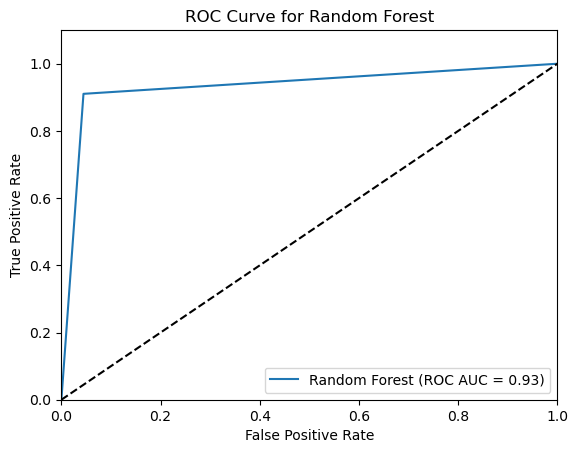

In [38]:
# Calculate metrics and plot ROC curve for Random Forest classifier
rf_metrics = calculate_metrics_and_confusion_matrix(rf_classifier, X_test, y_test, "Random Forest")

# Print metrics for Random Forest
print("Random Forest Metrics:")
print("Precision:", rf_metrics[0])
print("Recall:", rf_metrics[1])
print("F1-Score:", rf_metrics[2])
print("Confusion Matrix:\n", rf_metrics[3])
print("ROC-AUC Score:", rf_metrics[4])
print("\n")


# Customize plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Random Forest")
plt.plot([0,1],[0,1],"k--")
plt.legend(loc= "lower right")
plt.show()


Naive Bayes Metrics:
Precision: 0.8769734308817867
Recall: 0.9339758047980316
F1-Score: 0.9045774997517625
Confusion Matrix:
 [[5833  639]
 [ 322 4555]]
ROC-AUC Score: 0.9176214005448748




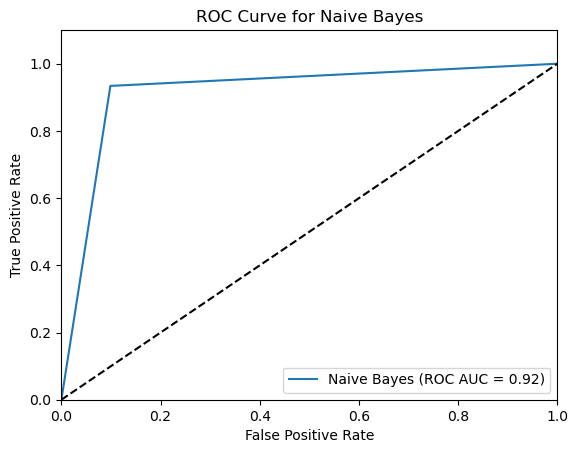

In [40]:
# Calculate metrics and plot ROC curve for Naive Bayes classifier
nb_metrics = calculate_metrics_and_confusion_matrix(nb_classifier, X_test, y_test, "Naive Bayes")

# Print metrics for Naive Bayes
print("Naive Bayes Metrics:")
print("Precision:", nb_metrics[0])
print("Recall:", nb_metrics[1])
print("F1-Score:", nb_metrics[2])
print("Confusion Matrix:\n", nb_metrics[3])
print("ROC-AUC Score:", nb_metrics[4])
print("\n")

# Customize plot for Naive Bayes

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Naive Bayes")
plt.plot([0,1],[0,1],"k--")
plt.legend(loc= "lower right")
plt.show()


K-Nearest Neighbors Metrics:
Precision: 0.928488775746355
Recall: 0.8226368669263892
F1-Score: 0.8723635572950641
Confusion Matrix:
 [[6163  309]
 [ 865 4012]]
ROC-AUC Score: 0.8874463691863095




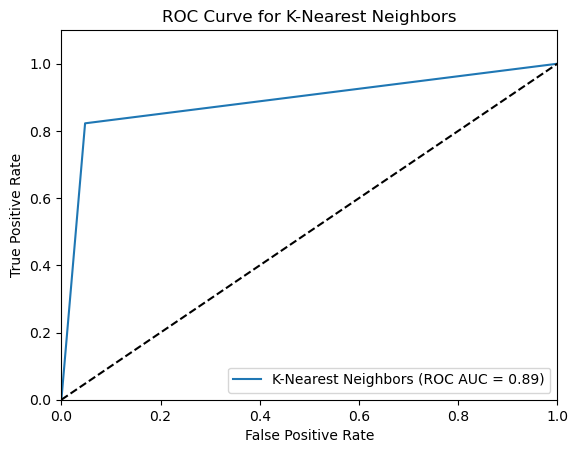

In [41]:
# Calculate metrics and plot ROC curve for KNN classifier
knn_metrics = calculate_metrics_and_confusion_matrix(knn_classifier, X_test, y_test, "K-Nearest Neighbors")

# Print metrics for KNN
print("K-Nearest Neighbors Metrics:")
print("Precision:", knn_metrics[0])
print("Recall:", knn_metrics[1])
print("F1-Score:", knn_metrics[2])
print("Confusion Matrix:\n", knn_metrics[3])
print("ROC-AUC Score:", knn_metrics[4])
print("\n")

# Customize plot for KNN
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for K-Nearest Neighbors")
plt.plot([0,1],[0,1],"k--")
plt.legend(loc= "lower right")
plt.show()


Support Vector Machine Metrics:
Precision: 0.9662372278987117
Recall: 0.8919417674800082
F1-Score: 0.9276042221985287
Confusion Matrix:
 [[6320  152]
 [ 527 4350]]
ROC-AUC Score: 0.9342279912801771




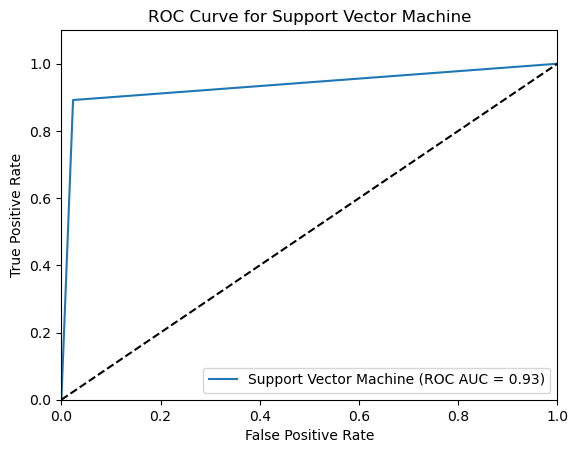

In [42]:
# Calculate metrics and plot ROC curve for SVM classifier
svm_metrics = calculate_metrics_and_confusion_matrix(svm_classifier, X_test, y_test, "Support Vector Machine")

# Print metrics for SVM
print("Support Vector Machine Metrics:")
print("Precision:", svm_metrics[0])
print("Recall:", svm_metrics[1])
print("F1-Score:", svm_metrics[2])
print("Confusion Matrix:\n", svm_metrics[3])
print("ROC-AUC Score:", svm_metrics[4])
print("\n")

# Customize plot for SVM
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Support Vector Machine")
plt.plot([0,1],[0,1],"k--")
plt.legend(loc= "lower right")
plt.show()


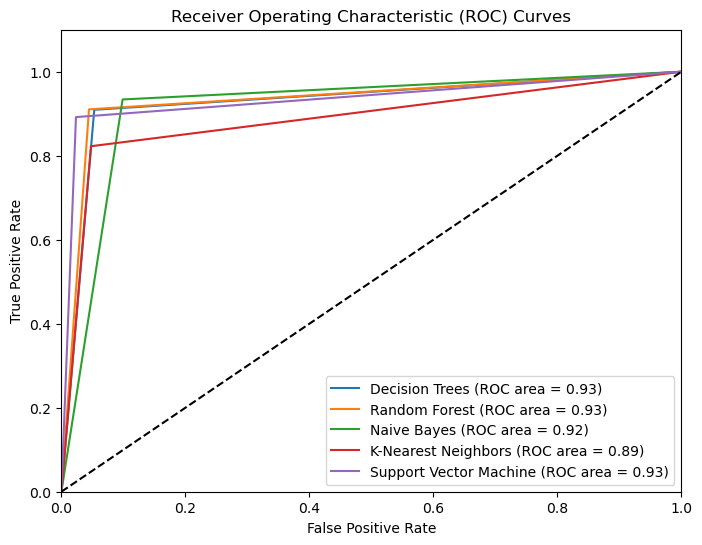

In [46]:
def plot_roc_auc(classifier, X_test, y_test, label):
    y_pred = classifier.predict(X_test)
    roc_auc = roc_auc_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s (ROC area = %0.2f)' % (label, roc_auc))
    return True

# Plot all ROC curves on the same plot
plt.figure(figsize=(8, 6))

# Calculate metrics and plot ROC curve for each classifier
classifiers = [(dt_classifier, 'Decision Trees'),
               (rf_classifier, 'Random Forest'),
               (nb_classifier, 'Naive Bayes'),
               (knn_classifier, 'K-Nearest Neighbors'),
               (svm_classifier, 'Support Vector Machine')]

for classifier, label in classifiers:
    plot_roc_auc(classifier, X_test, y_test, label)

# Compare the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0,1],[0,1],"k--")
plt.legend(loc="lower right")
plt.title("Receiver Operating Characteristic (ROC) Curves")
plt.show()


In [47]:
X_train, X_test, y_train, y_test = train_test_split(tfidf, df['Toxicity'], test_size=0.2, random_state=42)

In [48]:
X=tfidf
y=df['Toxicity']

In [50]:
X.shape,y.shape

((56745, 52755), (56745,))

In [49]:
y.value_counts()

Toxicity
0    32592
1    24153
Name: count, dtype: int64

In [51]:
from imblearn.combine import SMOTETomek

X_new,y_new= SMOTETomek().fit_resample(X,y)

In [52]:
y_new.value_counts()

Toxicity
0    32421
1    32421
Name: count, dtype: int64

In [53]:
def accuracy_checking(X_data, y_data, algorithm):
  #train test splitting
  X_train, X_test, y_train, y_test= train_test_split(X_data, y_data, test_size= 0.2, random_state=42)

  model= algorithm().fit(X_train, y_train)

  y_pred_train= model.predict(X_train)
  y_pred_test= model.predict(X_test)

  #checking the accuracy_score
  accuracy_train= accuracy_score(y_train, y_pred_train)
  accuracy_test= accuracy_score(y_test, y_pred_test)

  metrics={"Algorithm": algorithm.__name__,
           "Accuracy_Train": accuracy_train,
           "Accuracy_Test": accuracy_test}
  return metrics

In [54]:
print(accuracy_checking(X_new,y_new,DecisionTreeClassifier))
print(accuracy_checking(X_new,y_new,RandomForestClassifier))
print(accuracy_checking(X_new,y_new,MultinomialNB))
print(accuracy_checking(X_new,y_new,KNeighborsClassifier))
print(accuracy_checking(X_new,y_new,SVC))

{'Algorithm': 'DecisionTreeClassifier', 'Accuracy_Train': 0.9996915543731807, 'Accuracy_Test': 0.9414758269720102}
{'Algorithm': 'RandomForestClassifier', 'Accuracy_Train': 0.9996915543731807, 'Accuracy_Test': 0.9472588480222068}
{'Algorithm': 'MultinomialNB', 'Accuracy_Train': 0.9450388448711275, 'Accuracy_Test': 0.9147197162464338}
{'Algorithm': 'KNeighborsClassifier', 'Accuracy_Train': 0.6148670792126926, 'Accuracy_Test': 0.5939548153288612}
{'Algorithm': 'SVC', 'Accuracy_Train': 0.9932141962099743, 'Accuracy_Test': 0.9550466497031382}


In [55]:
# Decision Trees
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Random Forest
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Naive Bayes Model
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# K-NN Classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

# SVM
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

SVC()

In [56]:
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt

# Define a function to calculate metrics and confusion matrix
def calculate_metrics_and_confusion_matrix(classifier, X_test, y_test, label):
    y_pred = classifier.predict(X_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc_curve = auc(fpr, tpr)

    # Plot ROC curve with label
    plt.plot(fpr, tpr, label='%s (ROC AUC = %0.2f)' % (label, roc_auc))

    return precision, recall, f1, cm, roc_auc



Decision Trees Metrics:
Precision: 0.9265407760946255
Recall: 0.9155218371949969
F1-Score: 0.9209983498349835
Confusion Matrix:
 [[6118  354]
 [ 412 4465]]
ROC-AUC Score: 0.9304123401055332




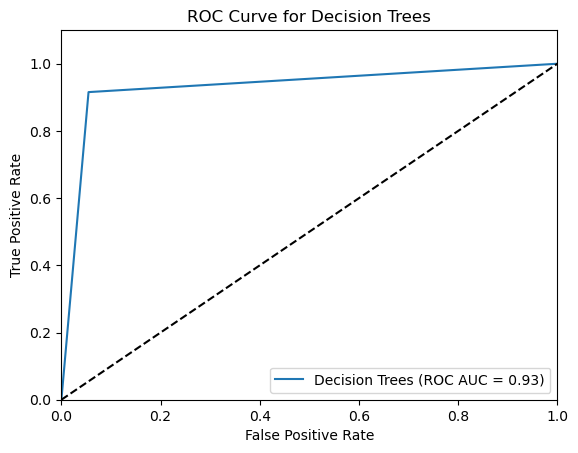

In [57]:
# Calculate metrics and plot ROC curve for Decision Trees classifier
dt_metrics = calculate_metrics_and_confusion_matrix(dt_classifier, X_test, y_test, "Decision Trees")

# Print metrics for Decision Trees
print("Decision Trees Metrics:")
print("Precision:", dt_metrics[0])
print("Recall:", dt_metrics[1])
print("F1-Score:", dt_metrics[2])
print("Confusion Matrix:\n", dt_metrics[3])
print("ROC-AUC Score:", dt_metrics[4])
print("\n")

# Customize plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Decision Trees")
plt.plot([0,1],[0,1],"k--")
plt.legend(loc= "lower right")
plt.show()


Random Forest Metrics:
Precision: 0.9433643279797126
Recall: 0.9153167931105187
F1-Score: 0.9291289416172338
Confusion Matrix:
 [[6204  268]
 [ 413 4464]]
ROC-AUC Score: 0.9369538230076698




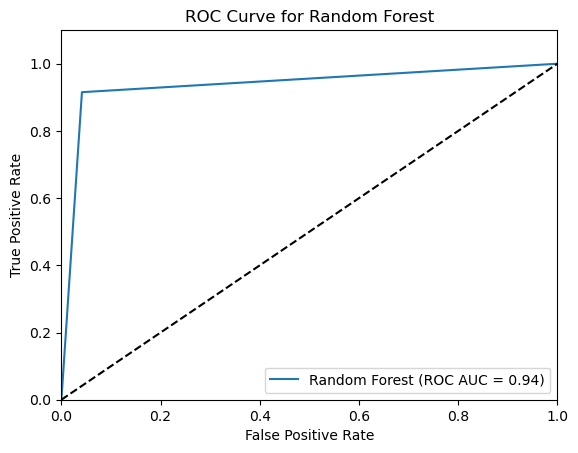

In [58]:
# Calculate metrics and plot ROC curve for Random Forest classifier
rf_metrics = calculate_metrics_and_confusion_matrix(rf_classifier, X_test, y_test, "Random Forest")

# Print metrics for Random Forest
print("Random Forest Metrics:")
print("Precision:", rf_metrics[0])
print("Recall:", rf_metrics[1])
print("F1-Score:", rf_metrics[2])
print("Confusion Matrix:\n", rf_metrics[3])
print("ROC-AUC Score:", rf_metrics[4])
print("\n")


# Customize plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Random Forest")
plt.plot([0,1],[0,1],"k--")
plt.legend(loc= "lower right")
plt.show()


Naive Bayes Metrics:
Precision: 0.8988741044012283
Recall: 0.9003485749436129
F1-Score: 0.8996107355050195
Confusion Matrix:
 [[5978  494]
 [ 486 4391]]
ROC-AUC Score: 0.9120098869773687




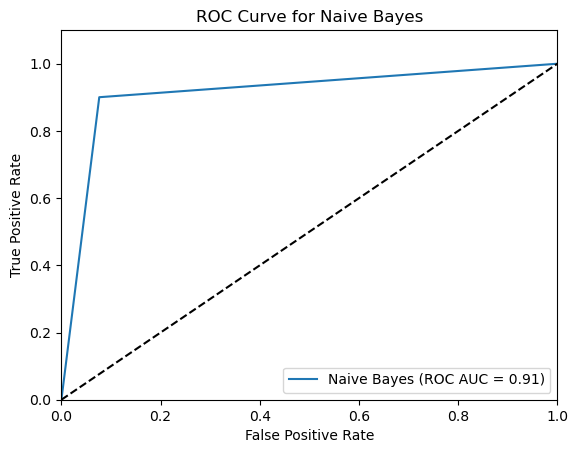

In [59]:
# Calculate metrics and plot ROC curve for Naive Bayes classifier
nb_metrics = calculate_metrics_and_confusion_matrix(nb_classifier, X_test, y_test, "Naive Bayes")

# Print metrics for Naive Bayes
print("Naive Bayes Metrics:")
print("Precision:", nb_metrics[0])
print("Recall:", nb_metrics[1])
print("F1-Score:", nb_metrics[2])
print("Confusion Matrix:\n", nb_metrics[3])
print("ROC-AUC Score:", nb_metrics[4])
print("\n")

# Customize plot for Naive Bayes

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Naive Bayes")
plt.plot([0,1],[0,1],"k--")
plt.legend(loc= "lower right")
plt.show()


K-Nearest Neighbors Metrics:
Precision: 0.7323121808898614
Recall: 0.20586426081607545
F1-Score: 0.3213828425096031
Confusion Matrix:
 [[6105  367]
 [3873 1004]]
ROC-AUC Score: 0.5745792255872714




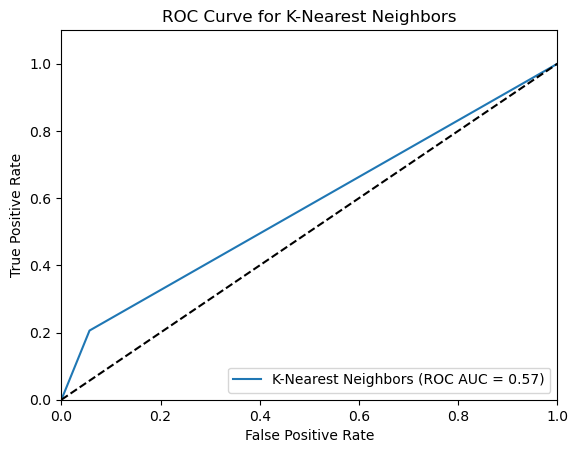

In [60]:
# Calculate metrics and plot ROC curve for KNN classifier
knn_metrics = calculate_metrics_and_confusion_matrix(knn_classifier, X_test, y_test, "K-Nearest Neighbors")

# Print metrics for KNN
print("K-Nearest Neighbors Metrics:")
print("Precision:", knn_metrics[0])
print("Recall:", knn_metrics[1])
print("F1-Score:", knn_metrics[2])
print("Confusion Matrix:\n", knn_metrics[3])
print("ROC-AUC Score:", knn_metrics[4])
print("\n")

# Customize plot for KNN
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for K-Nearest Neighbors")
plt.plot([0,1],[0,1],"k--")
plt.legend(loc= "lower right")
plt.show()


Support Vector Machine Metrics:
Precision: 0.969939879759519
Recall: 0.8931720319868772
F1-Score: 0.9299743808710503
Confusion Matrix:
 [[6337  135]
 [ 521 4356]]
ROC-AUC Score: 0.9361564733481975




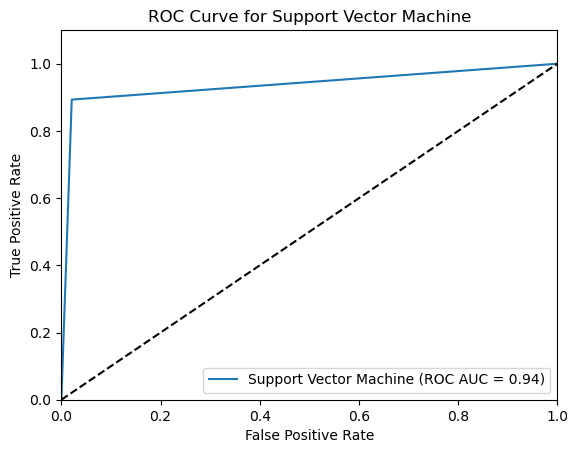

In [61]:
# Calculate metrics and plot ROC curve for SVM classifier
svm_metrics = calculate_metrics_and_confusion_matrix(svm_classifier, X_test, y_test, "Support Vector Machine")

# Print metrics for SVM
print("Support Vector Machine Metrics:")
print("Precision:", svm_metrics[0])
print("Recall:", svm_metrics[1])
print("F1-Score:", svm_metrics[2])
print("Confusion Matrix:\n", svm_metrics[3])
print("ROC-AUC Score:", svm_metrics[4])
print("\n")

# Customize plot for SVM
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Support Vector Machine")
plt.plot([0,1],[0,1],"k--")
plt.legend(loc= "lower right")
plt.show()


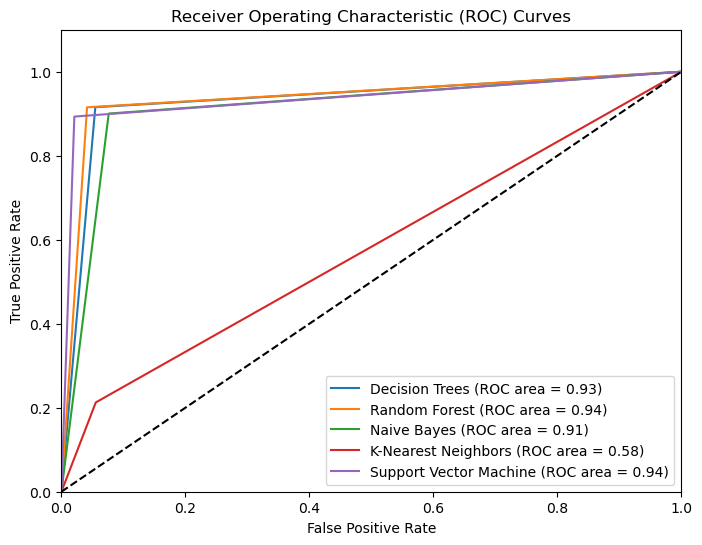

In [62]:
def plot_roc_auc(classifier, X_test, y_test, label):
    y_pred = classifier.predict(X_test)
    roc_auc = roc_auc_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s (ROC area = %0.2f)' % (label, roc_auc))
    return True

# Plot all ROC curves on the same plot
plt.figure(figsize=(8, 6))

# Calculate metrics and plot ROC curve for each classifier
classifiers = [(dt_classifier, 'Decision Trees'),
               (rf_classifier, 'Random Forest'),
               (nb_classifier, 'Naive Bayes'),
               (knn_classifier, 'K-Nearest Neighbors'),
               (svm_classifier, 'Support Vector Machine')]

for classifier, label in classifiers:
    plot_roc_auc(classifier, X_test, y_test, label)

# Compare the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0,1],[0,1],"k--")
plt.legend(loc="lower right")
plt.title("Receiver Operating Characteristic (ROC) Curves")
plt.show()


In [ ]:
#Prediction

In [50]:
#DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [53]:
new_text = ["&#8220;@SimplyHype: @kobebryant shut the fuck up, you fucking trash nigga, work on another ring&#8221;"]
new_X = count_vectorizer.transform(new_text)  
predictions = dt_classifier.predict(new_X)

print(predictions)

[1]


In [52]:
new_text = ["Wow! Today is a good day"]
new_X = count_vectorizer.transform(new_text)  
predictions = dt_classifier.predict(new_X)

print(predictions)

[0]


In [56]:
#Random Forest Classifier
new_text = ["you've gone and broke the wrong heart baby shit"]
new_X = count_vectorizer.transform(new_text)  
predictions = rf_classifier.predict(new_X)

if predictions == 1:
    print("Toxic Tweet")
    
elif predictions == 0:
    print("Non-Toxic Tweet")


Toxic Tweet


In [72]:
new_text = ["Wow! Today is a good day"]
new_X = count_vectorizer.transform(new_text)  
predictions = dt_classifier.predict(new_X)

if predictions == 1:
    print("Toxic Tweet")
    
elif predictions == 0:
    print("Non-Toxic Tweet")

Non-Toxic Tweet


In [63]:
# SVM
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

SVC()

In [69]:
new_text = ["The movie #abouttime a hard ass chick flick. This nigga goes back in time if he but too quick n fuck the bitch over n over lol"]
new_X = tfidf_vectorizer.transform(new_text)  
predictions = svm_classifier.predict(new_X)

if predictions == 1:
    print("Toxic Tweet")
    
elif predictions == 0:
    print("Non-Toxic Tweet")

Toxic Tweet


In [71]:
new_text = ["RT @That1guyJeff: RT @rebeccaisfresh: carrot cake is trash. too sweet. http://t.co/rxrowJMbW0"]
new_X = tfidf_vectorizer.transform(new_text)  
predictions = svm_classifier.predict(new_X)

if predictions == 1:
    print("Toxic Tweet")
    
elif predictions == 0:
    print("Non-Toxic Tweet")

Non-Toxic Tweet
